In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Overview of the dataset

In [ ]:
df = pd.read_excel('/content/sample_data/churn_prediction.xlsx')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14


In [ ]:
df.shape


(5630, 20)

## Check info & missing values:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
#count missing values
print(df.isnull().sum())


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [ ]:
# Handle missing values
data = df.copy()

In [ ]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
data['Tenure'].fillna(0, inplace=True) #fill with 0
data['HourSpendOnApp'].fillna(data['HourSpendOnApp'].median(), inplace=True) #fill with median
data['WarehouseToHome'].fillna(data['WarehouseToHome'].median(), inplace=True) #fill with median
data['OrderAmountHikeFromlastYear'].fillna(data['OrderAmountHikeFromlastYear'].mean(), inplace=True) #fill with mean
data['CouponUsed'].fillna(0, inplace=True) #fill with 0
data['OrderCount'].fillna(0, inplace=True) #fill with 0
data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].median(), inplace=True) #fill with median

In [ ]:
print(data.isnull().sum()) #double check

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


## Check duplicated values


In [ ]:
data.duplicated().sum()

0

## Check imbalanced values:

In [ ]:
df_check = data.groupby('Churn')['CustomerID'].count().reset_index()
df_check['%'] = (df_check['CustomerID']/sum(df_check['CustomerID']))
df_check.rename(columns = {'CustomerID': 'total'}, inplace=True)
print(df_check)

   Churn  total         %
0      0   4682  0.831616
1      1    948  0.168384


## Define type of data

In [ ]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [ ]:
obj_cols = data.select_dtypes(include=['object'])
num_cols = data.select_dtypes(exclude=['object'])

In [ ]:
  num_cols.nunique()

,0
CustomerID,5630
Churn,2
Tenure,36
CityTier,3
WarehouseToHome,34
HourSpendOnApp,6
NumberOfDeviceRegistered,6
SatisfactionScore,5
NumberOfAddress,15
Complain,2


In [ ]:
obj_cols.nunique()

,0
PreferredLoginDevice,3
PreferredPaymentMode,7
Gender,2
PreferedOrderCat,6
MaritalStatus,3


## Feature Engineering and Scaling of the data


In [ ]:
X = pd.get_dummies(obj_cols)
X.head(2)

,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,False,True,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
1,True,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [ ]:
y = data['Churn']
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
5625,0
5626,0
5627,0
5628,0


In [ ]:
num_cols_2 = num_cols.iloc[:,2:]
num_cols_2

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,20.0,3,7.0,4.0,4,5,3,0,26.000000,5.0,16.0,3.0,229.53
1,13.0,1,9.0,4.0,4,3,2,0,26.000000,11.0,0.0,9.0,234.38
2,16.0,3,7.0,3.0,4,3,3,0,26.000000,5.0,12.0,7.0,174.07
3,5.0,1,16.0,3.0,4,4,3,0,26.000000,2.0,2.0,9.0,231.48
4,9.0,1,28.0,3.0,4,2,3,1,26.000000,1.0,2.0,8.0,165.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,61.0,3,28.0,4.0,4,1,6,1,15.707922,1.0,2.0,1.0,303.75
5626,23.0,1,9.0,3.0,4,1,5,0,15.707922,5.0,5.0,4.0,316.61
5627,29.0,2,33.0,4.0,2,4,6,1,15.707922,2.0,2.0,5.0,321.36
5628,13.0,1,16.0,3.0,4,1,4,0,15.707922,2.0,2.0,4.0,319.31


In [ ]:
list_columns = num_cols_2.columns.tolist()
from sklearn.preprocessing import StandardScaler
# Filter the DataFrame
filter_df = num_cols_2[list_columns]

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data
model = scaler.fit(filter_df)

# Transform the data using the fitted scaler
scaled_data = model.transform(filter_df)

# Create a new DataFrame with the scaled data
df_scale = pd.DataFrame(scaled_data, columns=list_columns)
df_scale.head(5)

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1.192565,1.469771,-1.026550,1.510158,0.30375,1.400807,-0.469944,-0.631198,2.868786,1.764448,4.466913,-0.408739,1.063092
1,0.381132,-0.715286,-0.786892,1.510158,0.30375,-0.048392,-0.857037,-0.631198,2.868786,4.944974,-0.976459,1.271788,1.161664
2,0.728889,1.469771,-1.026550,0.092654,0.30375,-0.048392,-0.469944,-0.631198,2.868786,1.764448,3.106070,0.711612,-0.064083
3,-0.546219,-0.715286,0.051912,0.092654,0.30375,0.676207,-0.469944,-0.631198,2.868786,0.174185,-0.296038,1.271788,1.102724
4,-0.082543,-0.715286,1.489861,0.092654,0.30375,-0.772992,-0.469944,1.584290,2.868786,-0.355903,-0.296038,0.991700,-0.245577


In [ ]:
X_new = pd.concat([df_scale, X], axis=1)
X_new.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.192565,1.469771,-1.026550,1.510158,0.30375,1.400807,-0.469944,-0.631198,2.868786,1.764448,...,False,True,False,False,False,False,False,False,True,False
1,0.381132,-0.715286,-0.786892,1.510158,0.30375,-0.048392,-0.857037,-0.631198,2.868786,4.944974,...,False,True,False,False,False,False,False,False,False,True
2,0.728889,1.469771,-1.026550,0.092654,0.30375,-0.048392,-0.469944,-0.631198,2.868786,1.764448,...,True,False,False,True,False,False,False,True,False,False
3,-0.546219,-0.715286,0.051912,0.092654,0.30375,0.676207,-0.469944,-0.631198,2.868786,0.174185,...,True,True,False,False,False,False,False,False,True,False
4,-0.082543,-0.715286,1.489861,0.092654,0.30375,-0.772992,-0.469944,1.584290,2.868786,-0.355903,...,False,False,False,True,False,False,False,True,False,False


## Find important features


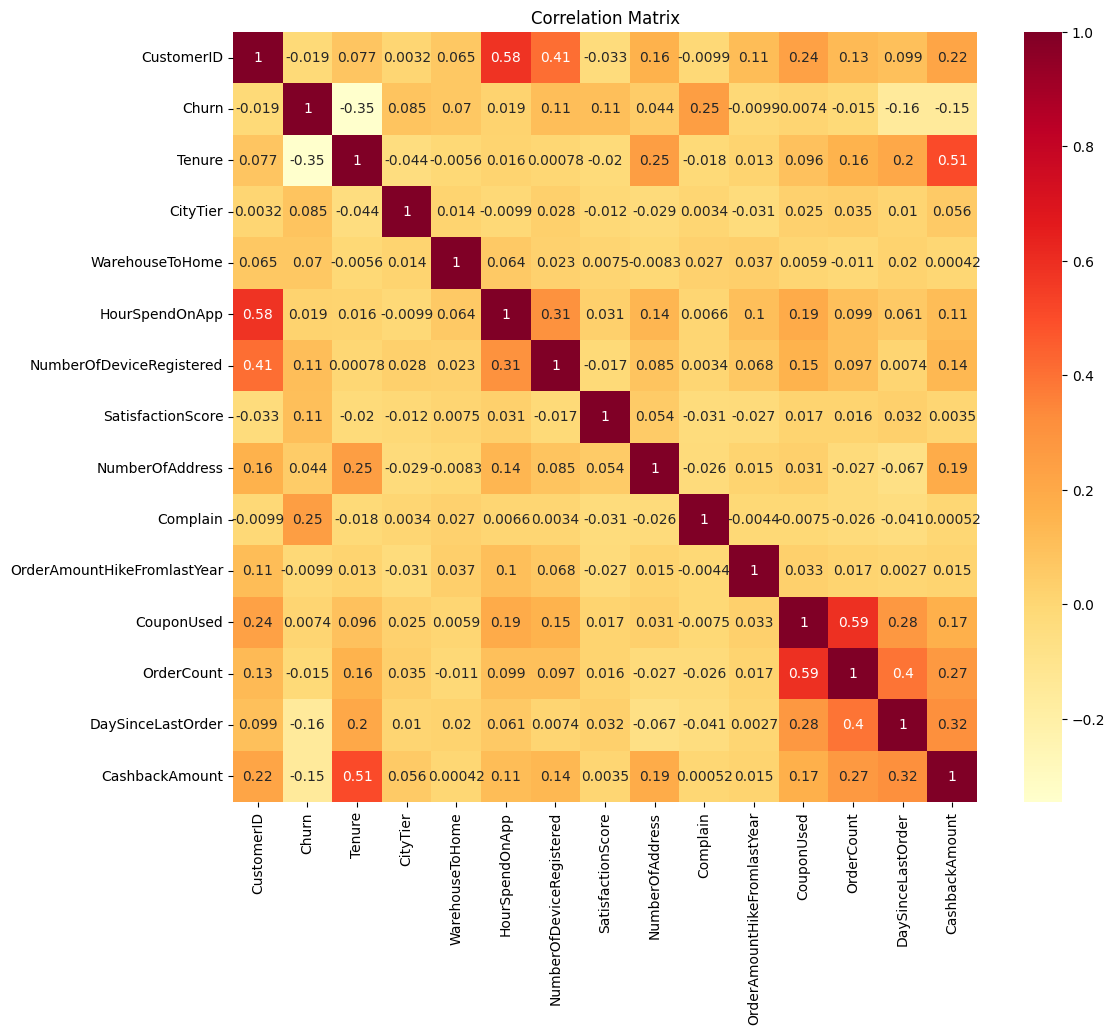

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(num_cols.corr(), annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y,
                                                    test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(criterion='gini')

# Fit the model
dt_model.fit(X_new, y)

DecisionTreeClassifier()

In [ ]:
# Get feature importances
importances = dt_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame(importances, index=X_new.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

                                       Importance
Tenure                                   0.292843
WarehouseToHome                          0.078485
CashbackAmount                           0.076346
NumberOfAddress                          0.071708
Complain                                 0.066281
OrderAmountHikeFromlastYear              0.059139
DaySinceLastOrder                        0.058374
SatisfactionScore                        0.035330
NumberOfDeviceRegistered                 0.032395
CityTier                                 0.030112
MaritalStatus_Single                     0.022079
PreferredLoginDevice_Computer            0.020695
OrderCount                               0.015832
PreferredPaymentMode_CC                  0.015296
PreferredPaymentMode_Debit Card          0.013130
PreferedOrderCat_Laptop & Accessory      0.011790
MaritalStatus_Married                    0.010602
PreferredPaymentMode_UPI                 0.009782
HourSpendOnApp                           0.009201


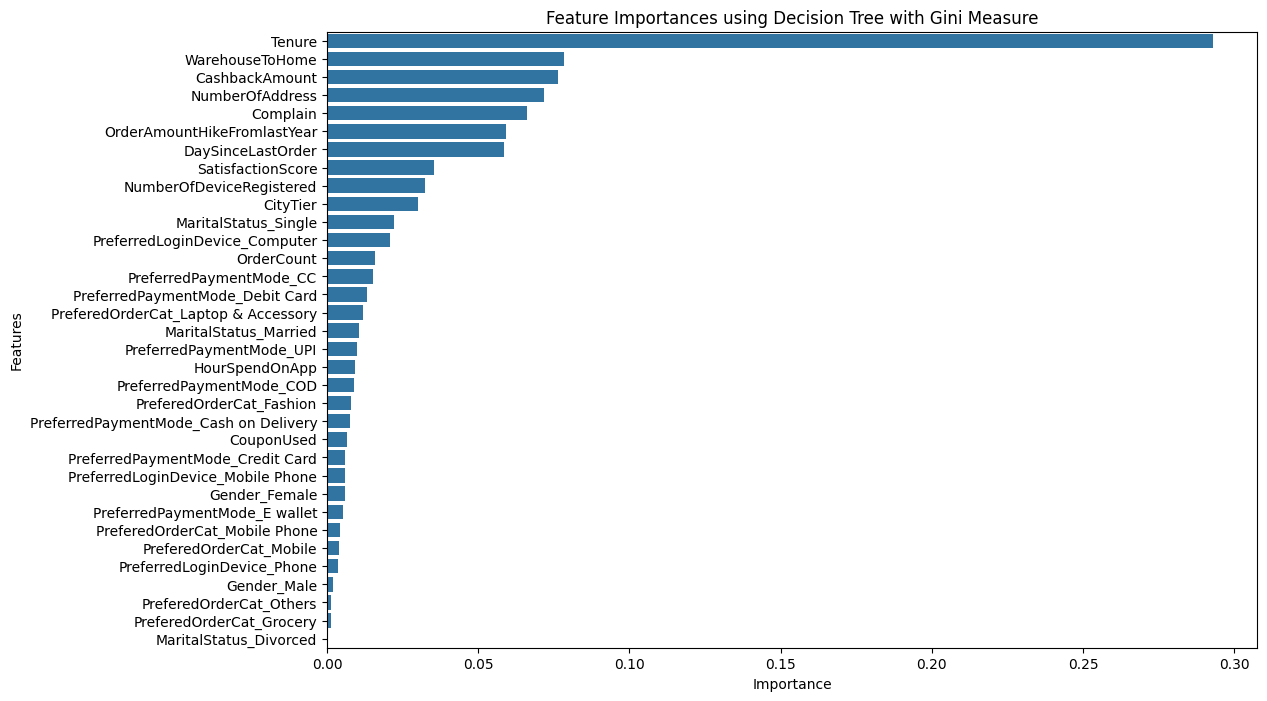

In [ ]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.title('Feature Importances using Decision Tree with Gini Measure')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
feature_imp_select = feature_importances[feature_importances >=0.05]
feature_imp_select = feature_imp_select.dropna().reset_index()
feature_imp_select

,index,Importance
0,Tenure,0.292843
1,WarehouseToHome,0.078485
2,CashbackAmount,0.076346
3,NumberOfAddress,0.071708
4,Complain,0.066281
5,OrderAmountHikeFromlastYear,0.059139
6,DaySinceLastOrder,0.058374


In [ ]:
# Filter features with importance > 0.01
important_features = feature_imp_select['index'].tolist()
important_features

['Tenure',
 'WarehouseToHome',
 'CashbackAmount',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'DaySinceLastOrder']

# EDA

## Numeric Feartures:

IndexError: index 8 is out of bounds for axis 0 with size 8

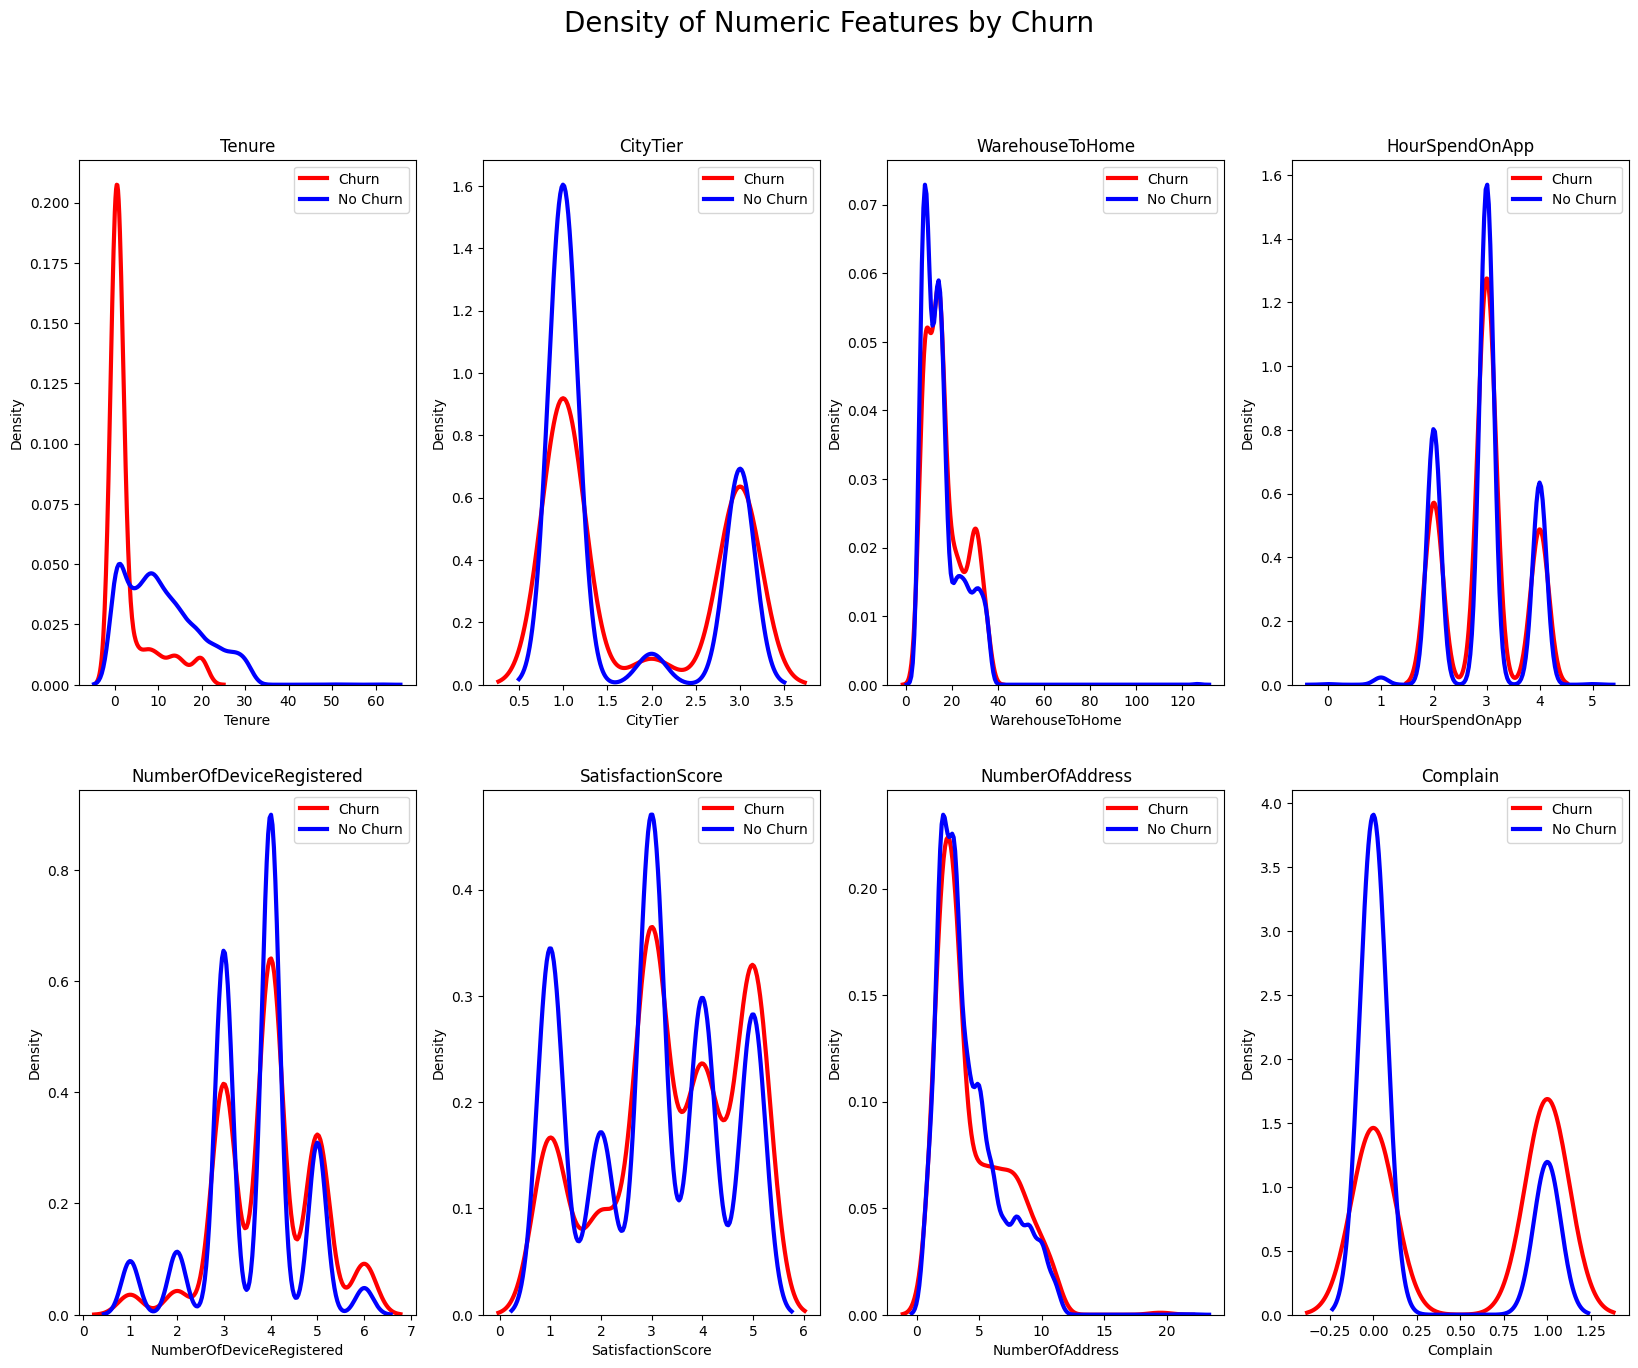

In [ ]:
df_c = data[data['Churn']==1].copy()
df_nc = data[data['Churn']==0].copy()

fig, ax = plt.subplots(2, 4, figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()  # Flatten the subplot for iteration

for idx, col in enumerate(num_cols_2):
    sns.kdeplot(
        df_c[col], label='Churn', linewidth=3, color='red', ax=ax[idx]
    )
    sns.kdeplot(df_nc[col], label='No Churn', linewidth=3, color='blue', ax=ax[idx])

    ax[idx].set_title(col, fontsize=12)  # Add title for each subplot
    ax[idx].legend(loc='upper right')  # Consistent legend placement

plt.tight_layout()  # Adjust spacing for better readability
plt.show()

## **Distribution Insights of the Numeric Features**
- **Tenure:** Customers with longer tenure are less likely to churn, indicating that a longer relationship with the company correlates with higher satisfaction.

- **CityTier:** The churn rate is similar across different city tiers, suggesting that city tier is not a strong predictor of churn.

- **WarehouseToHome:** Customers living closer to the warehouse have lower churn rates, implying that faster deliveries might enhance customer satisfaction.

- **HourSpendOnApp:** Increased time spent on the app is associated with lower churn rates, indicating that higher app engagement is a positive sign.

- **NumberOfDeviceRegistered:** A higher number of registered devices correlates with lower churn, suggesting that access across multiple devices improves user convenience and loyalty.

- **SatisfactionScore**: Higher satisfaction scores are strongly linked to lower churn rates, highlighting satisfaction as a critical driver of customer retention.

- **NumberOfAddress:** There is a slight decrease in churn rates as the number of addresses increases, indicating that customers with multiple addresses might be more loyal.

- **Complain:** While more complaints are associated with higher churn, the relationship is not very strong. Nonetheless, complaints negatively impact satisfaction.

- **OrderAmountHikeFromLastYear:** Customers who spent significantly more last year are less likely to churn, emphasizing the importance of retaining high-value customers.

- **CouponUsed:** The use of coupons is correlated with lower churn rates, suggesting that coupons can enhance customer loyalty.

- **OrderCount:** Higher order counts are associated with lower churn rates, indicating that frequent usage helps in building customer habits and retention.

- **DaySinceLastOrder:** Longer intervals since the last order correlate with higher churn rates, making recency a strong predictor of churn.

In [ ]:
def count_percentage_tns(df, column, target, count='CustomerID'):
    '''
    This function creates a table to calculate the percentage of churned/non-churned users on total transactions grouped by category values.
    '''

    # Create 2 dataframes of churned and non-churned
    churned = df[df[target] == 1].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by=count)
    not_churned = df[df[target] == 0].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by=count)

    # Merge 2 dataframes into one:
    cate_df = churned.merge(not_churned, on=column, how='outer')
    cate_df = cate_df.fillna(0)
    cate_df.rename(columns={count+'_x': 'churned', count+'_y': 'not_churned'}, inplace=True)

    # Calculate the percentage:
    cate_df['%'] = cate_df['churned'] / (cate_df['churned'] + cate_df['not_churned'])

    return cate_df

def count_percentage_cc(df, column, target, count='CustomerID'):
    '''
    This function creates a table to calculate the percentage of churned/non-churned card numbers on total card numbers grouped by category values.
    '''

    # Create 2 dataframes of churned and non-churned
    churned = df[df[target] == 1].groupby(column)[[count]].nunique().reset_index().sort_values(ascending=False, by=count)
    not_churned = df[df[target] == 0].groupby(column)[[count]].nunique().reset_index().sort_values(ascending=False, by=count)

    # Merge 2 dataframes into one:
    cate_df = churned.merge(not_churned, on=column, how='outer')
    cate_df = cate_df.fillna(0)
    cate_df.rename(columns={count+'_x': 'churned', count+'_y': 'not_churned'}, inplace=True)

    # Calculate the percentage:
    cate_df['%'] = cate_df['churned'] / (cate_df['churned'] + cate_df['not_churned'])

    return cate_df

## Tenure


<ipython-input-37-cc36f9cc7397>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tenor_, x='Tenure', y='%', palette='viridis')


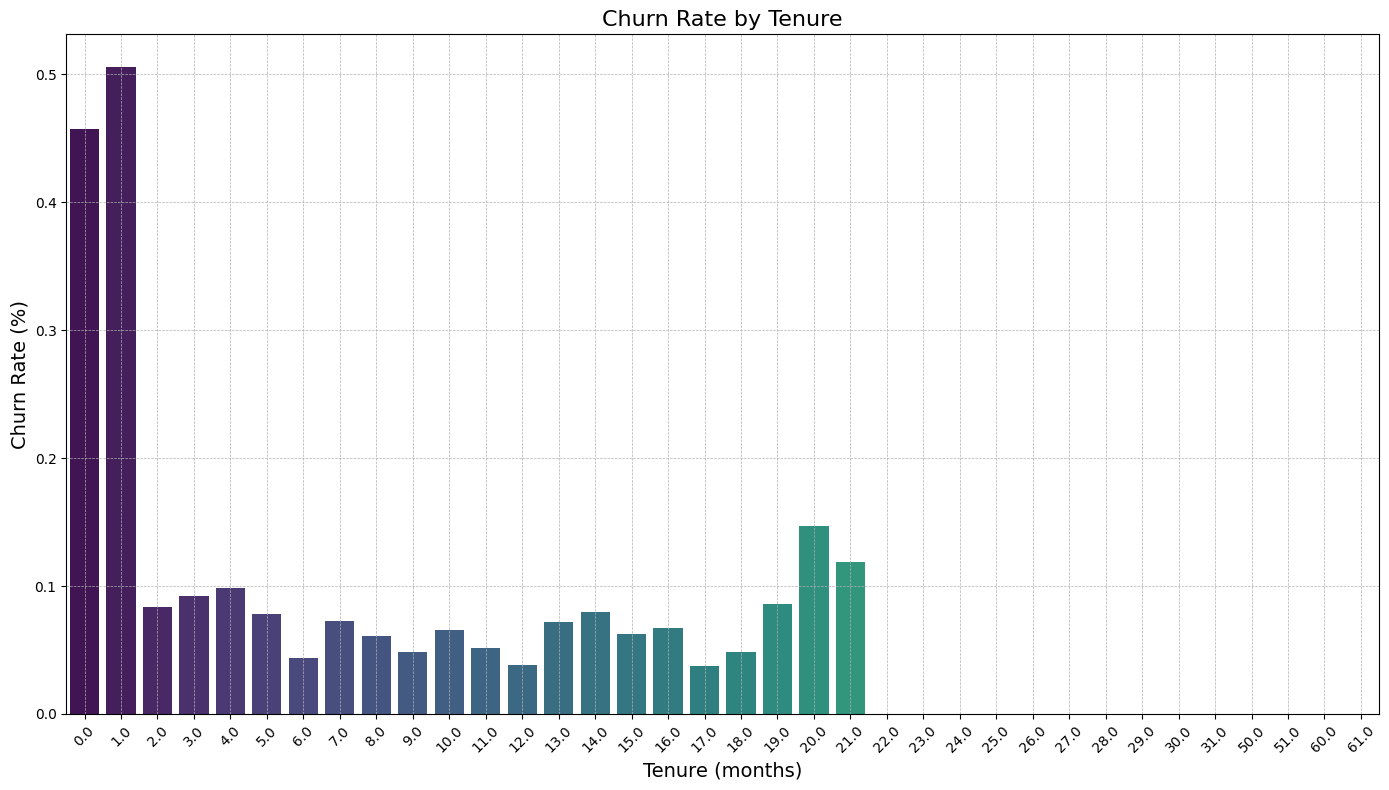

In [ ]:
tenor_ = count_percentage_cc(data, 'Tenure', 'Churn', 'CustomerID')
# Assuming tenor_ is already computed
plt.figure(figsize=(14, 8))
sns.barplot(data=tenor_, x='Tenure', y='%', palette='viridis')

plt.title('Churn Rate by Tenure', fontsize=16)
plt.xlabel('Tenure (months)', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

## **Conclusion on Churn Rate by Tenure**
The bar plot depicting the churn rate by tenure reveals the following key insights:

- **High Initial Churn Rate**: The churn rate is exceptionally high for customers with very short tenures (0-1 months). This suggests that customers are most likely to leave the service within the first month of their subscription. This period might be critical for customer retention strategies.

- **Decrease in Churn Rate Over Time**: After the initial spike, the churn rate decreases significantly as tenure increases. This indicates that customers who stay beyond the first few months are less likely to churn.

- **Small Increases at Specific Points**: There are noticeable increases in the churn rate at specific tenure points, notably around 18-22 months. This could point to specific customer lifecycle events or dissatisfaction points that warrant further investigation.

- **Overall Trend**: Generally, the churn rate stabilizes at a lower level for customers with longer tenures, indicating that long-term customers are more loyal.

## **Recommendations**
- **Focus on Onboarding**: Enhance the onboarding process to reduce churn within the first month. This could include better customer support, clearer usage instructions, or introductory offers.

- **Monitor and Support Mid-Term Customers**: Investigate the reasons behind the spikes in churn around the 18-22 month marks and develop targeted retention strategies for customers reaching these critical points in their tenure.

- **Long-Term Engagement**: Continue to engage and add value for long-term customers to maintain the lower churn rates observed in this group.

By addressing these areas, it may be possible to reduce overall churn rates and improve customer retention.

## Ware house To Home

<ipython-input-38-19f9bd878735>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=WarehouseToHome, x='WarehouseToHome', y='%', palette='viridis')


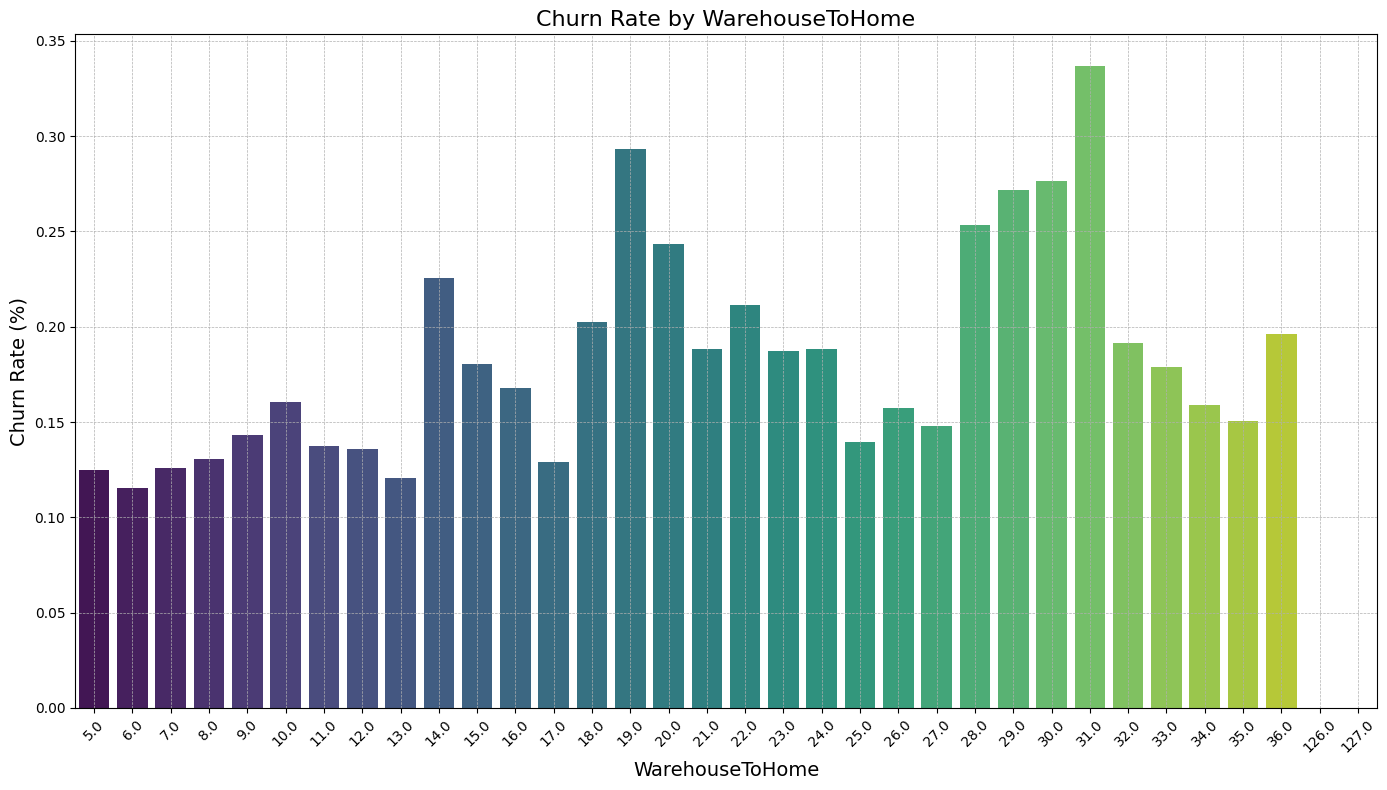

In [ ]:
WarehouseToHome = count_percentage_cc(data, 'WarehouseToHome', 'Churn', 'CustomerID')
# Create the chart
plt.figure(figsize=(14, 8))
sns.barplot(data=WarehouseToHome, x='WarehouseToHome', y='%', palette='viridis')

plt.title('Churn Rate by WarehouseToHome', fontsize=16)
plt.xlabel('WarehouseToHome', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

## **Conclusion on Churn Rate by WarehouseToHome**
The bar plot depicting the churn rate by WarehouseToHome distance reveals the following key insights:
- Shorter warehouse to home distances have a lower churn rate. Faster deliveries may improve satisfaction.

## Recommendations
- It's important to consider the cost-benefit of placing warehouses closer to customers. While it might reduce churn, there might be higher operational costs associated with maintaining more warehouses.
- Analyze the data further to see if the correlation between distance and churn holds true across different customer segments or product categories.
- Explore alternative fulfillment options like local delivery partners or micro-fulfillment centers to reach customers closer to warehouses even faster.

## Cashback Amount

<Axes: xlabel='Churn', ylabel='CashbackAmount'>

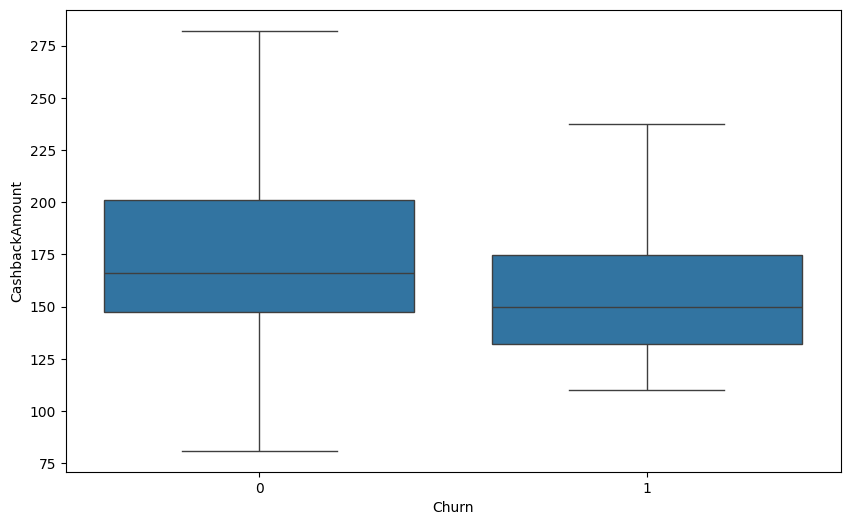

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=data, x='Churn',y='CashbackAmount',ax=ax, showfliers = False)


Churn users recevied cashback amount less than not churn users.

## Complain

<ipython-input-40-f1a77f4d3c63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Complain_, x='Complain', y='%', palette='viridis')


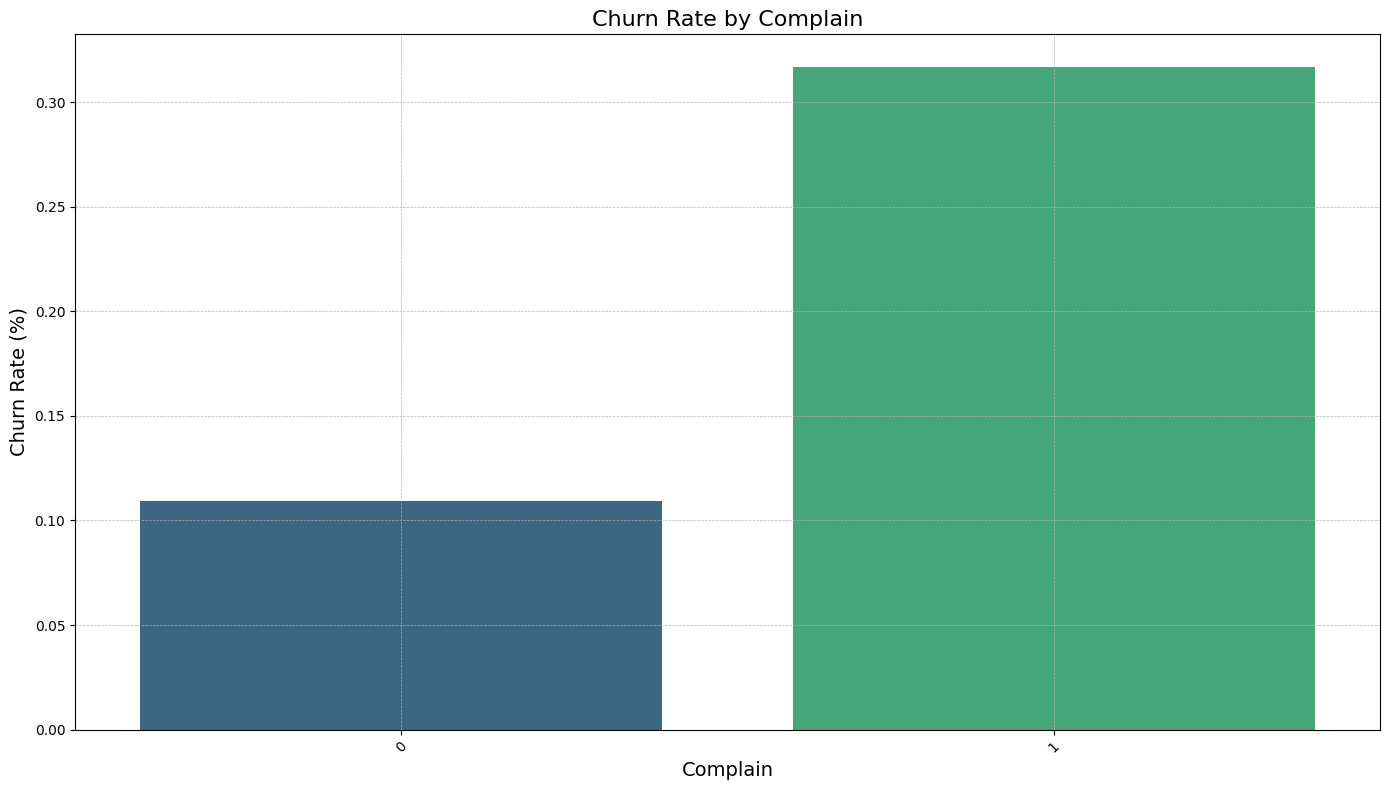

In [ ]:
Complain_ = count_percentage_cc(data, 'Complain', 'Churn', 'CustomerID')
# Assuming tenor_ is already computed
plt.figure(figsize=(14, 8))
sns.barplot(data=Complain_, x='Complain', y='%', palette='viridis')

plt.title('Churn Rate by Complain', fontsize=16)
plt.xlabel('Complain', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

## **Conclusion on Churn Rate by Complain**
**Higher Churn Rate Among Complainers:**
- The bar chart shows that customers who have made complaints (Complain = 1) have a significantly higher churn rate, around 30%, compared to those who have not made complaints (Complain = 0), whose churn rate is approximately 10%.
**Complaints as a Strong Indicator of Churn:**
- The data indicates that customer complaints are a strong indicator of potential churn.
- The significant difference in churn rates suggests that customers who complain are more likely to leave the service.
## **Recommendations**

**Improve Customer Service Response**
1. **Timely Resolution:**

- Ensure that customer complaints are addressed and resolved promptly.
- Implement a system to track and manage complaints efficiently.
2. **Follow-up:**

- Follow up with customers after their issues have been resolved to ensure satisfaction and prevent future churn.

**Understand the Root Cause:**
1. **Analyze Complaints:**
- Conduct a detailed analysis of the complaints to identify common issues or pain points.
2. **Process Improvements:**

- Use this analysis to make necessary improvements to products, services, or processes that are causing dissatisfaction.

**Proactive Customer Engagement:**
1. **Regular Feedback:**

- Regularly collect feedback from customers to identify and address potential issues before they escalate to complaints.
2. **Loyalty Programs:**

- Implement loyalty programs to reward customers for their feedback and continued patronage, which can help reduce churn.

**Enhanced Communication Channels:**
1. **Multiple Channels:**

- Provide multiple channels (e.g., phone, email, chat, social media) for customers to voice their concerns.
2. **Training:**

- Train customer service representatives to handle complaints effectively and empathetically.

By focusing on improving the response to complaints and addressing the underlying issues causing dissatisfaction, you can reduce the churn rate and improve overall customer retention.

## Number Of Address


<ipython-input-41-854d52ffa6eb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=NumberOfAddress_, x='NumberOfAddress', y='%', palette='viridis')


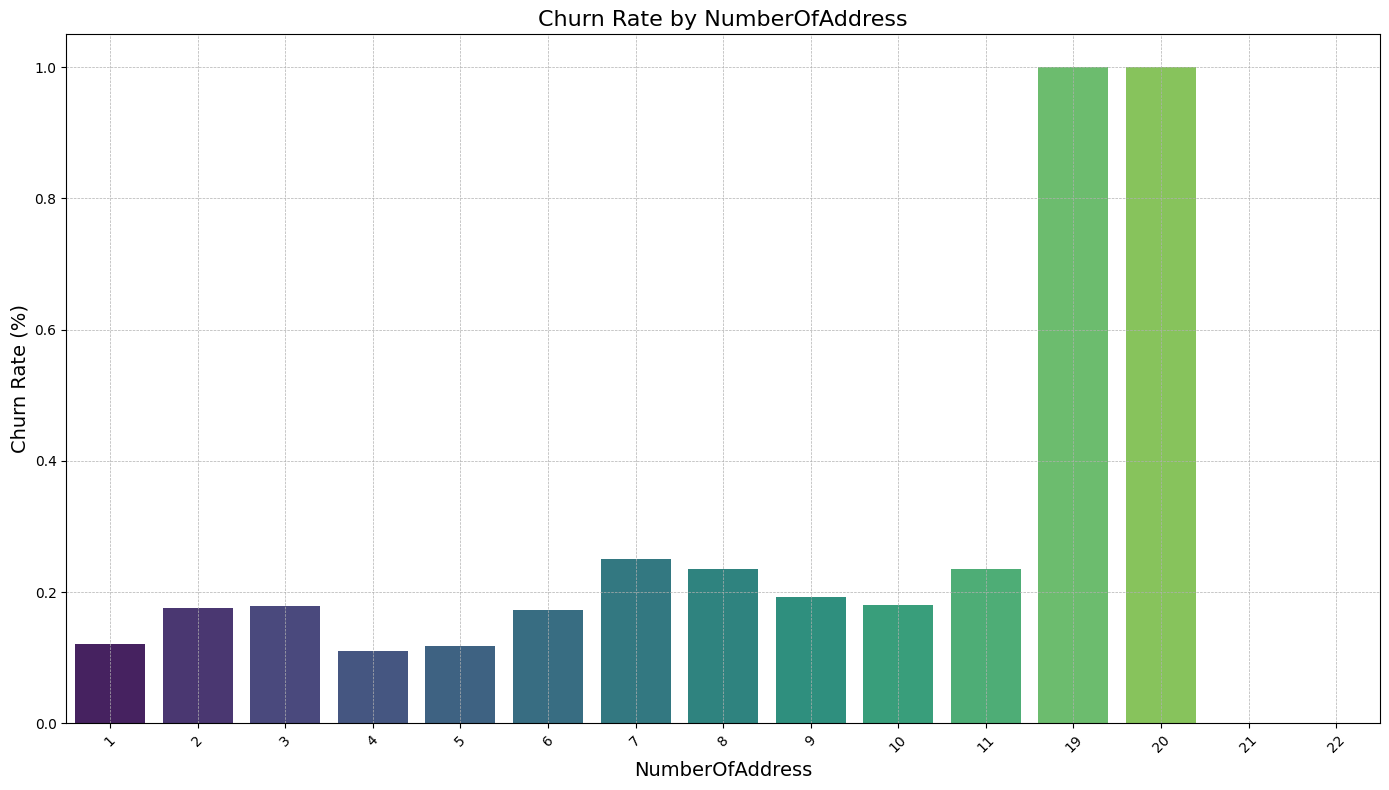

In [ ]:
NumberOfAddress_ = count_percentage_cc(data, 'NumberOfAddress', 'Churn', 'CustomerID')
# Assuming tenor_ is already computed
plt.figure(figsize=(14, 8))
sns.barplot(data=NumberOfAddress_, x='NumberOfAddress', y='%', palette='viridis')

plt.title('Churn Rate by NumberOfAddress', fontsize=16)
plt.xlabel('NumberOfAddress', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
NumberOfAddress_tns = count_percentage_tns(data, 'NumberOfAddress', 'Churn', 'CustomerID')

In [ ]:
NumberOfAddress_.sort_values(by=['%','churned'], ascending = False)


,NumberOfAddress,churned,not_churned,%
11,19,1.0,0.0,1.000000
12,20,1.0,0.0,1.000000
6,7,64.0,192.0,0.250000
4,8,66.0,214.0,0.235714
10,11,23.0,75.0,0.234694
7,9,46.0,193.0,0.192469
9,10,35.0,159.0,0.180412
1,3,228.0,1050.0,0.178404
0,2,241.0,1128.0,0.176041
3,6,66.0,316.0,0.172775


In [ ]:
NumberOfAddress_data = data[['NumberOfAddress','Churn']]


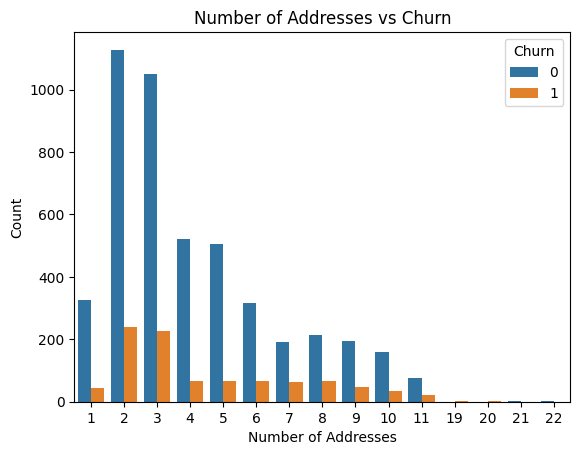

In [ ]:
sns.countplot(x='NumberOfAddress', hue='Churn', data=NumberOfAddress_data)
plt.title('Number of Addresses vs Churn')
plt.xlabel('Number of Addresses')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

As numberofadress = 19 and 20, we see the % of churn = 100% and the number of churned users = 1.This not significant to get the insight. There're no relationship

## Day Since Last Order

In [ ]:
DaySinceLastOrder_ = count_percentage_cc(data, 'DaySinceLastOrder', 'Churn', 'CustomerID')
DaySinceLastOrder_.sort_values(by=['%','churned'], ascending = False)

,DaySinceLastOrder,churned,not_churned,%
15,46.0,1.0,0.0,1.000000
2,0.0,170.0,326.0,0.342742
1,1.0,182.0,432.0,0.296417
13,15.0,4.0,15.0,0.210526
3,2.0,122.0,670.0,0.154040
0,3.0,184.0,1023.0,0.152444
5,7.0,65.0,382.0,0.145414
9,6.0,16.0,97.0,0.141593
6,4.0,58.0,373.0,0.134571
7,5.0,28.0,200.0,0.122807


Frequency of higher churn came from customer who in last 0 and 1 day ordering items


<Axes: xlabel='Churn', ylabel='DaySinceLastOrder'>

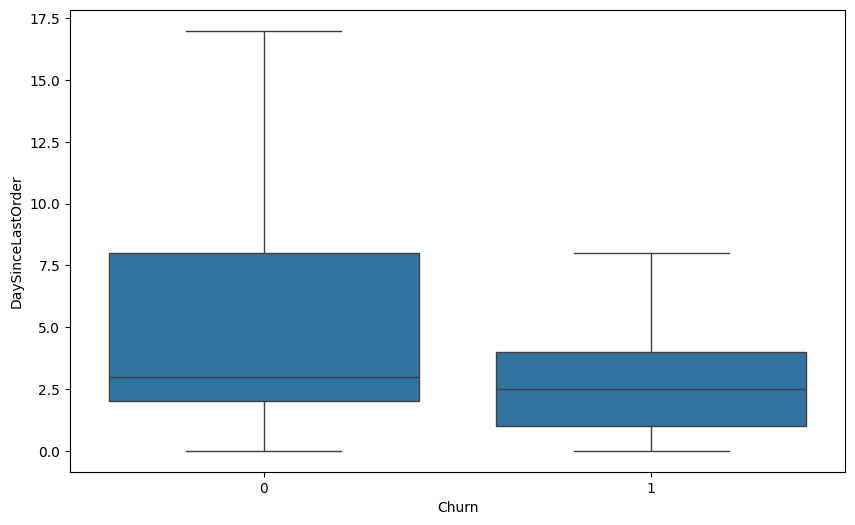

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=data, x='Churn',y='DaySinceLastOrder',ax=ax, showfliers = False)


From this chart, we see for churned users, they had orders recently (the day since last order less than not churned users) --> This quite strange, we should monitor more features for this insight (satisfaction_score, complain,..)

## Order Amount Hike From last Year

In [ ]:
OrderAmountHikeFromlastYear_data = data[['OrderAmountHikeFromlastYear','Churn']]
OrderAmountHikeFromlastYear_data

,OrderAmountHikeFromlastYear,Churn
0,26.000000,0
1,26.000000,0
2,26.000000,0
3,26.000000,0
4,26.000000,0
...,...,...
5625,15.707922,0
5626,15.707922,0
5627,15.707922,0
5628,15.707922,0


<ipython-input-49-5fafa3dcdb5e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=OrderAmountHikeFromlastYear_, x='OrderAmountHikeFromlastYear', y='%', palette='viridis')


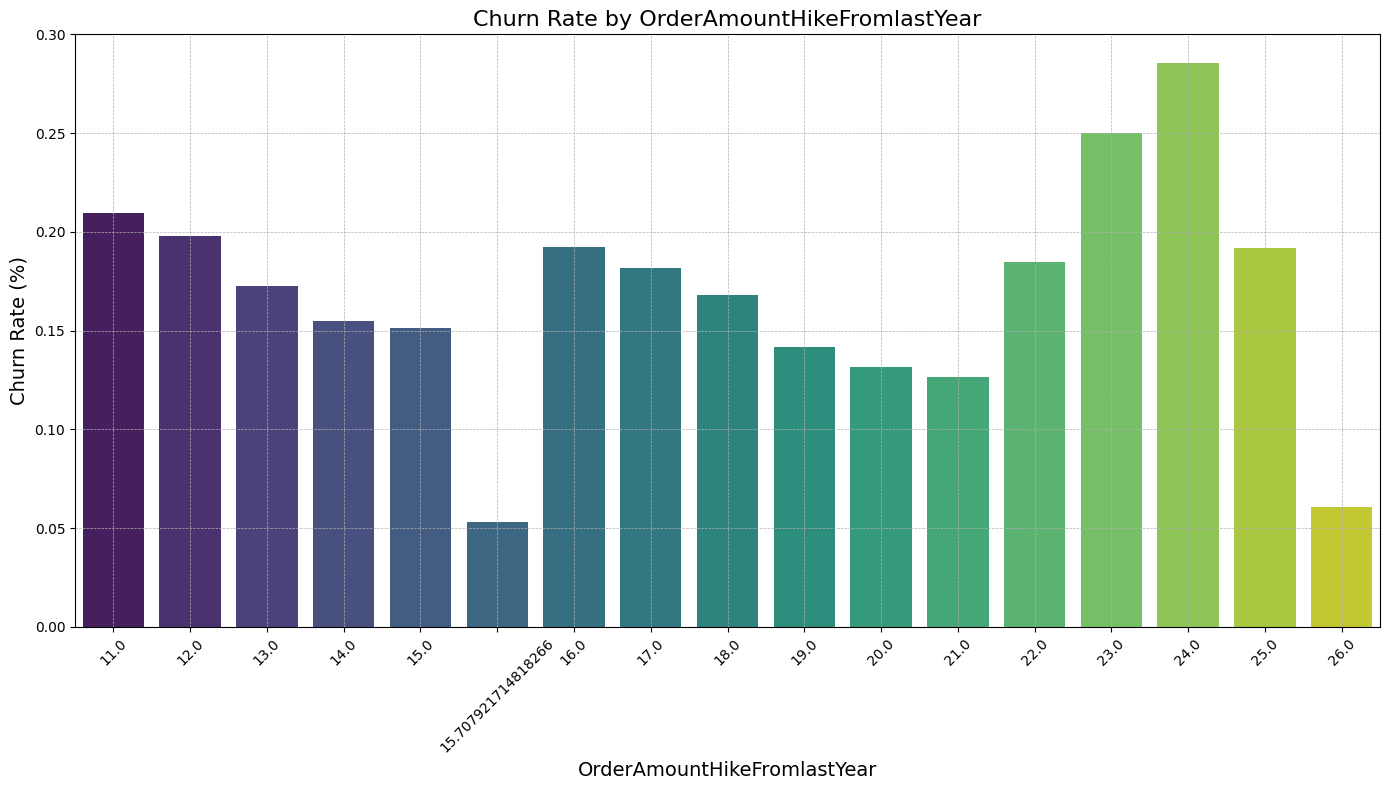

In [ ]:
OrderAmountHikeFromlastYear_ = count_percentage_cc(data, 'OrderAmountHikeFromlastYear', 'Churn', 'CustomerID')
# Assuming tenor_ is already computed
plt.figure(figsize=(14, 8))
sns.barplot(data=OrderAmountHikeFromlastYear_, x='OrderAmountHikeFromlastYear', y='%', palette='viridis')

plt.title('Churn Rate by OrderAmountHikeFromlastYear', fontsize=16)
plt.xlabel('OrderAmountHikeFromlastYear', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
OrderAmountHikeFromlastYear_.sort_values(by=['%','churned'], ascending = False)

,OrderAmountHikeFromlastYear,churned,not_churned,%
13,24.000000,24,60,0.285714
9,23.000000,36,108,0.250000
3,11.000000,82,309,0.209719
0,12.000000,144,584,0.197802
5,16.000000,64,269,0.192192
15,25.000000,14,59,0.191781
10,22.000000,34,150,0.184783
6,17.000000,54,243,0.181818
1,13.000000,128,613,0.172740
7,18.000000,54,267,0.168224


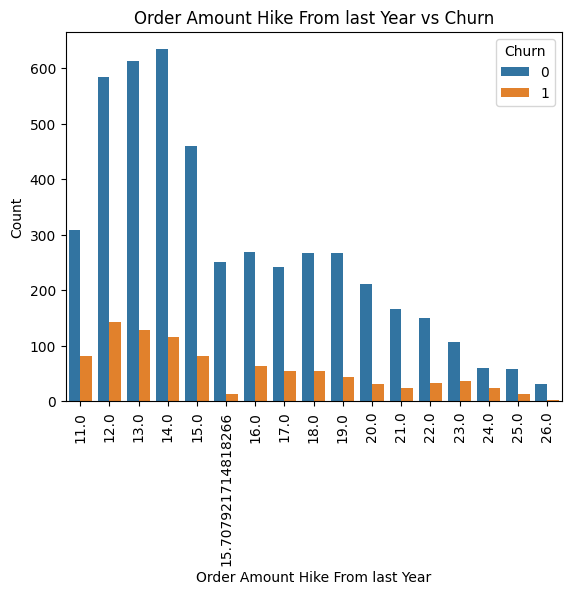

In [ ]:
OrderAmountHikeFromlastYear_data = data[['OrderAmountHikeFromlastYear','Churn']]
sns.countplot(x='OrderAmountHikeFromlastYear', hue='Churn', data=OrderAmountHikeFromlastYear_data)
plt.title('Order Amount Hike From last Year vs Churn')
plt.xlabel('Order Amount Hike From last Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Churn', loc='upper right')
plt.show()

**Conclusion on Churn Rate by Complain Order Amount Hike:**

- The relationship between OrderAmountHikeFromLastYear and Churn Rate is inverse - higher order amount increases are associated with lower churn rates.
- The optimal order amount increase range appears to be around 12-14% from the previous year, where the churn rate is lowest.

**Recommendations**
- Focus strategies on driving 12-14% order amount increases from existing customers, as this range minimizes churn rates.

# Build Model

## Find the Best Model


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import datetime
import numpy as np
import pandas as pd

models = [
    LogisticRegression(solver='liblinear'),
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    SVC(kernel='linear')
]
CV = 10
entries = []
for model in models:
    scores_train = []
    scores_test = []
    abs_scores = []
    time_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    confusion_matrices = []

    for j in range(CV):
        t1 = datetime.datetime.now()
        model.fit(X_train, y_train)
        t2 = datetime.datetime.now()

        model_name = model.__class__.__name__
        s_train = model.score(X_train, y_train)
        s_test = model.score(X_test, y_test)
        scores_train.append(s_train)
        scores_test.append(s_test)
        abs_scores.append(abs(s_train - s_test))
        time_scores.append(round((t2 - t1).microseconds / 1000, 1))

        y_pred = model.predict(X_test)
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

    entries.append([
        model_name,
        np.array(scores_train).mean(),
        np.array(scores_test).mean(),
        np.array(abs_scores).mean(),
        np.array(time_scores).mean(),
        np.array(precision_scores).mean(),
        np.array(recall_scores).mean(),
        np.array(f1_scores).mean(),
        np.mean(confusion_matrices, axis=0)  # average confusion matrix
    ])

cv_df_2 = pd.DataFrame(entries, columns=[
    'model_name', 'score_train_mean', 'score_test_mean', 'abs_mean', 'time_mean',
    'precision_mean', 'recall_mean', 'f1_mean', 'confusion_matrix_mean'
])

In [ ]:
cv_df_2

,model_name,score_train_mean,score_test_mean,abs_mean,time_mean,precision_mean,recall_mean,f1_mean,confusion_matrix_mean
0,LogisticRegression,0.891144,0.895204,0.004060,45.57,0.888039,0.895204,0.888528,"[[1356.0, 51.0], [126.0, 156.0]]"
1,GaussianNB,0.733063,0.742451,0.009388,13.26,0.836866,0.742451,0.770989,"[[1049.0, 358.0], [77.0, 205.0]]"
2,KNeighborsClassifier,0.942908,0.911782,0.031126,9.96,0.907783,0.911782,0.904870,"[[1377.0, 30.0], [119.0, 163.0]]"
3,DecisionTreeClassifier,1.000000,0.948313,0.051687,40.61,0.948531,0.948313,0.948409,"[[1362.0, 45.0], [42.3, 239.7]]"
4,RandomForestClassifier,1.000000,0.957075,0.042925,560.22,0.957270,0.957075,0.955155,"[[1398.4, 8.6], [63.9, 218.1]]"
5,SVC,0.889876,0.899349,0.009473,610.70,0.892776,0.899349,0.892212,"[[1363.0, 44.0], [126.0, 156.0]]"


**Recommendation**

**Best Model: RandomForestClassifier**

- Reason: It has the highest accuracy, precision, recall, and F1-score. Despite the higher training time, it provides the best overall performance.

**Alternative Model: KNeighborsClassifier**

- Reason: If training time and computational efficiency are critical, this model offers very good performance with minimal training time.

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [20, 50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 1, 42]
}

In [ ]:
import datetime
x1 = datetime.datetime.now()
print(x1)

2024-09-26 08:48:22.400425


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_new, y, test_size=0.3, random_state = 42)

In [ ]:
CV_model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)


In [58]:
CV_model.fit(X1_train, y1_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
675 fits failed out of a total of 2025.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
675 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [20, 50, 100, 150, 200],
                         'random_state': [0, 1, 42]})

In [59]:
print(CV_model.best_params_)

{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 0}


In [60]:
x2 = datetime.datetime.now()
print(x2)

2024-09-26 08:59:36.610185


In [61]:
d = x2 - x1
print(d)

0:11:14.209760


In [62]:
y_pred = CV_model.predict(X1_test)

In [63]:
print("The Training R^2 score is: ",
      CV_model.score(X1_train,y1_train)*100,"%")
print("The Testing R^2 score is: ",
      CV_model.score(X1_test,y1_test)*100,"%")

The Training R^2 score is:  100.0 %
The Testing R^2 score is:  94.02013025458852 %


In [64]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1211  196]
 [ 241   41]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1407
           1       0.17      0.15      0.16       282

    accuracy                           0.74      1689
   macro avg       0.50      0.50      0.50      1689
weighted avg       0.72      0.74      0.73      1689



## Test

In [65]:
model_2 = RandomForestClassifier(n_estimators=200)

In [66]:
model_2.fit(X1_train, y1_train)

RandomForestClassifier(n_estimators=200)

In [67]:
y_pred_2 = model_2.predict(X1_test)

In [68]:
print("The Training R^2 score is: ",
      model_2.score(X1_train,y1_train)*100,"%")
print("The Testing R^2 score is: ",
      model_2.score(X1_test,y1_test)*100,"%")

The Training R^2 score is:  100.0 %
The Testing R^2 score is:  93.84251036116045 %


In [69]:
print(confusion_matrix(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))

[[1213  194]
 [ 242   40]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1407
           1       0.17      0.14      0.16       282

    accuracy                           0.74      1689
   macro avg       0.50      0.50      0.50      1689
weighted avg       0.72      0.74      0.73      1689

